In [1]:
using Cumulants
using Plots; gr()
using HDF5
using LaTeXStrings
using FFTW
using LinearAlgebra
using LsqFit

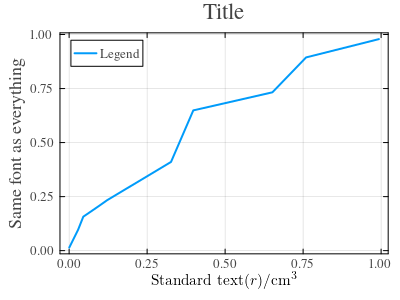

In [2]:
plot_font = "Times"
default(fontfamily=plot_font, linewidth=2, framestyle=:box, label=nothing, grid=false, size=(400,300), legend=:none)
# scalefontsizes(1.0)

display(Plots.plot(sort(rand(10)),sort(rand(10)),label="Legend", xlabel=L"\textrm{Standard text}(r) / \mathrm{cm^3}", ylabel="Same font as everything", grid=true, title="Title", legend=:topleft))
# annotate!(0.2,0.8,text("My note",plot_font,12))

# savefig("./plot.pdf")

[ Info: Saved animation to /home/max/Repos/VMC_with_LPTFs/evaluation/tmp.gif


Plots.AnimatedGif("/home/max/Repos/VMC_with_LPTFs/evaluation/tmp.gif")
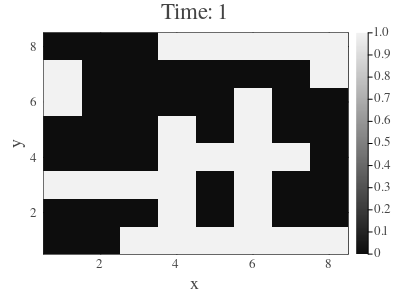

In [3]:
h5file = h5open("../samples.h5", "r")  # Open file for writing
timesteps = keys(h5file) # Print all datasets in file
steps = zeros(length(timesteps), 64)

@gif for i ∈ 1:length(timesteps)
    t = timesteps[i]
    data = Array(h5file[t][:,:,1])
    lattice = reshape(data, 8, 8)
    Plots.heatmap(lattice, c=:grays, title="Time: $i", xlabel="x", ylabel="y", legend=:topleft)
    steps[i,:] = data
end 

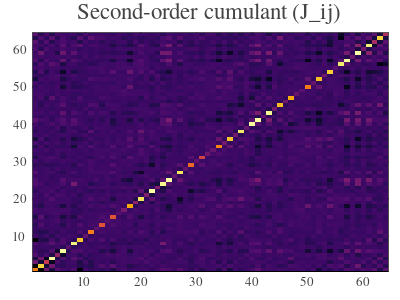

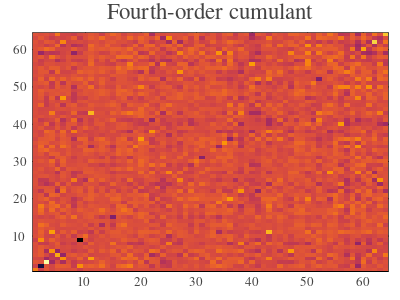

In [4]:
order = 4  # Order of cumulants to compute
cumulant_tensors = cumulants(steps, order)

# Convert to standard array for easier interpretation
cumulant_matrices = [Array(c) for c in cumulant_tensors]

# Plot second-order cumulant (interaction matrix)
display(heatmap(cumulant_matrices[2], title="Second-order cumulant (J_ij)", color=:inferno))
display(heatmap(cumulant_matrices[4][:,:,1,1], title="Fourth-order cumulant", color=:inferno))

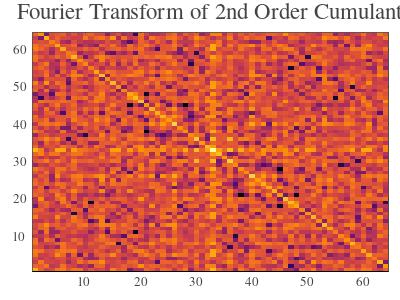

In [22]:
# Get the second-order cumulant matrix (L × L)
C2 = cumulant_matrices[2]

# Compute the 2D Fourier transform
C2_fourier = fft(C2)

# Shift zero frequency to the center
C2_fourier_shifted = fftshift(C2_fourier)

# Plot the absolute value of the Fourier-transformed cumulant
heatmap(log10.(abs.(C2_fourier_shifted)), title="Fourier Transform of 2nd Order Cumulant", color=:inferno)#, cscaling=:log)

Estimated correlation length: 2.773877743369575e-7


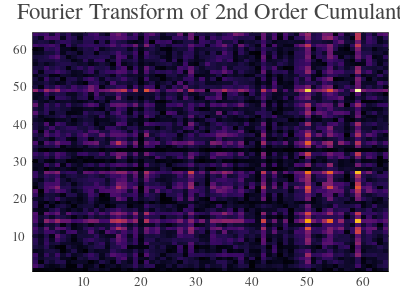

In [23]:
using Plots

Gamma2_fourier = inv(fft(C2))

xi = 1 / sqrt(abs(Gamma2_fourier[1,1]))
println("Estimated correlation length: ", xi)

display(heatmap(abs.(fftshift(Gamma2_fourier)), title="Fourier Transform of 2nd Order Cumulant", color=:inferno))